In [1]:
#from platform import python_version

#print(python_version())

In [2]:
import tensorflow as tf ##pip install tensorflow-gpu
import cv2 ### pip install opencv-python
##pip install opencv-contrib-python fullpackage
import os
import matplotlib.pyplot as plt ## pip install matlplotlib
import numpy as np ## pip install numpy 

In [3]:
#!pip install tensorflow-gpu

In [4]:
img_array = cv2.imread("Train_Dataset/Closed_Eyes/s0001_00391_0_0_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)

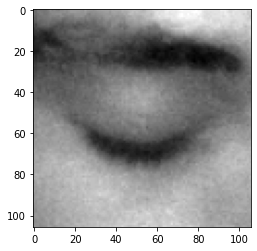

In [5]:
plt.imshow(img_array,cmap = "gray")

In [6]:
img_array.shape

(106, 106)

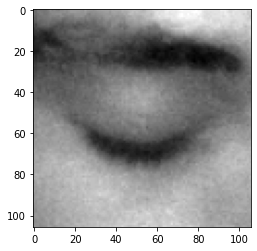

In [7]:
Datadirectory= "Train_Dataset/" ## training dataset 
Classes = ["Closed_Eyes","Open_Eyes"] ## List of classes 
for category in Classes: 
    path = os.path.join(Datadirectory, category) ## // 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB) 
        plt.imshow(img_array, cmap="gray") 
        plt.show()
        break
    break

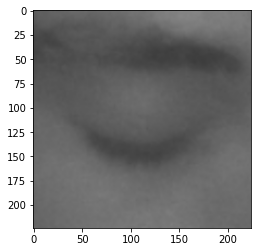

In [8]:
img_size= 224

new_array= cv2.resize(backtorgb, (img_size, img_size)) 
plt.imshow(new_array, cmap="gray")
plt.show()

# reading all the images and converting them into an array for data and labels

In [9]:
training_Data= []

def create_training_Data(): 
    for category in Classes:
        path = os.path.join(Datadirectory, category) 
        class_num = Classes.index(category) ## 1, 
        for img in os.listdir(path): 
            try:
                img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB) 
                new_array= cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [10]:
create_training_Data()

In [11]:
print(len(training_Data))

7000


In [12]:
import random

random.shuffle(training_Data)

In [13]:
X = [] 
y = []

for features, label in training_Data: 
    X.append(features) 
    y.append (label)

X= np.array(X).reshape(-1, img_size, img_size, 3).astype('int')

In [14]:
X.shape

(7000, 224, 224, 3)

In [15]:
# normalize the data
X=X/255; ## we are normalizing it

In [16]:
Y=np.array(y)

In [17]:
#import pickle

#pickle_out= open("x.pickle", "wb") 
#pickle.dump(X, pickle_out)
#pickle_out.close()

#pickle_out= open("y.pickle","wb") 
#pickle.dump(y, pickle_out)
#pickle_out.close()

# deep learning model for training - transfer learning 

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.mobilenet.MobileNet()

In [20]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

# Transfer Learning

In [21]:
base_input = model.layers[0].input

In [22]:
base_output = model.layers[-4].output

In [23]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('tanh')(final_output)

In [24]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [25]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

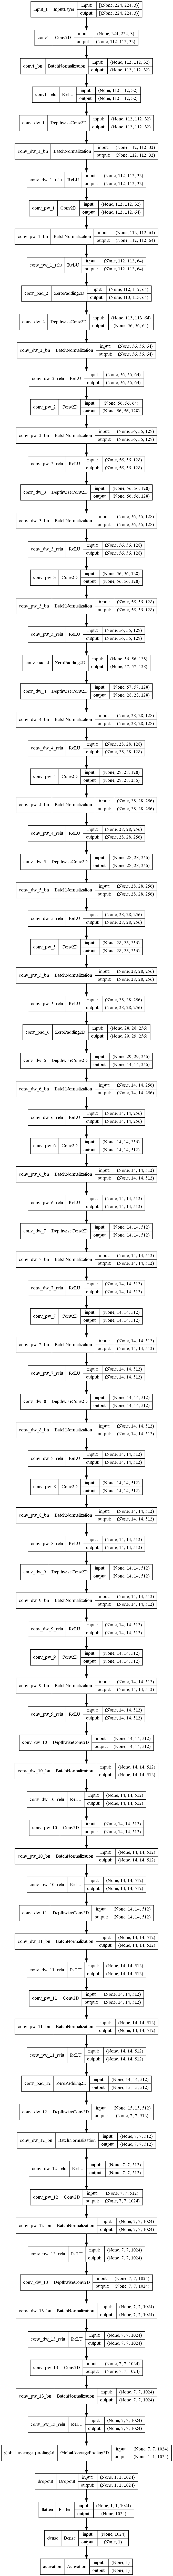

In [26]:
from keras.utils.vis_utils import plot_model
import pydot
plot_model(new_model, to_file='DDS_model_plot.png', show_shapes=True, show_layer_names=True)

In [27]:
new_model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [28]:
history = new_model.fit(X,Y,epochs = 10, validation_split = 0.25)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
165/165 [==============================] - ETA: 0s - loss: 2.1119 - accuracy: 0.8297WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F45F9F5A60> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

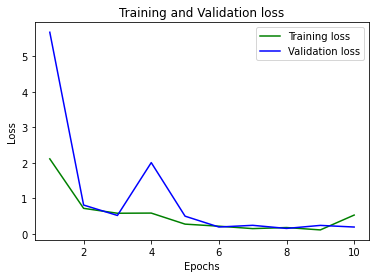

In [29]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

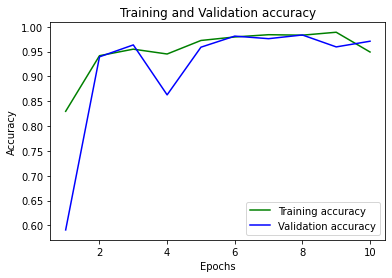

In [30]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
new_model.save('my_model.h5')

In [32]:
model = tf.keras.models.load_model('my_model.h5')

(1, 224, 224, 3)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


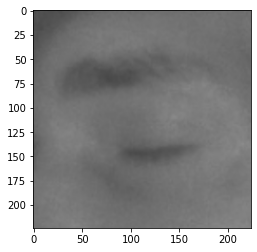

In [33]:
img_size = 224
img_array = cv2.imread('test_data/close_eyes/s0015_00023_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))
X_input = np.array(new_array).reshape(1,img_size,img_size,3)
print(X_input.shape)
plt.imshow(new_array)
X_input = X_input/255.0
prediction = model.predict(X_input)

In [34]:
print(prediction)

[[-0.7229256]]


(1, 224, 224, 3)


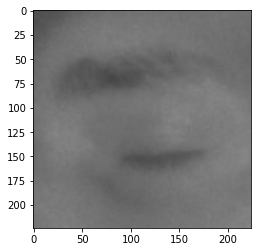

In [35]:
img_array = cv2.imread('test_data/close_eyes/s0015_00024_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))
X_input = np.array(new_array).reshape(1,img_size,img_size,3)
print(X_input.shape)
plt.imshow(new_array)
X_input = X_input/255.0
prediction = model.predict(X_input)

In [36]:
print(prediction)

[[-0.9962502]]


(1, 224, 224, 3)


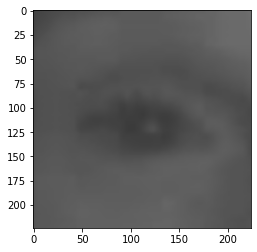

In [37]:
img_array = cv2.imread('test_data/open_eyes/s0021_00143_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))
X_input = np.array(new_array).reshape(1,img_size,img_size,3)
print(X_input.shape)
plt.imshow(new_array)
X_input = X_input/255.0
prediction = model.predict(X_input)

In [38]:
print(prediction)

[[1.]]


## Working on unknown images

In [39]:
img = cv2.imread('sad_woman.jpg')

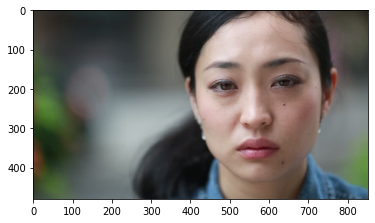

In [40]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [41]:
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [42]:
eyecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [43]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [44]:
eye = eyecascade.detectMultiScale(gray,1.1,4)

In [45]:
for (x,y,w,h) in eye:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0), 2)

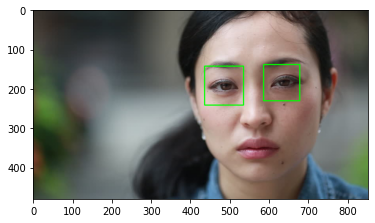

In [46]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# cropping_eye_image

In [47]:
eyecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eye = eyecascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eye:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eyecascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print('eyes not detected')
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]

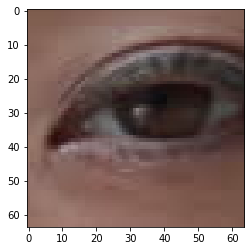

In [48]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [49]:
eyes_roi.shape

(64, 64, 3)

In [50]:
final_image = cv2.resize(eyes_roi,(img_size,img_size))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [51]:
final_image.shape

(1, 224, 224, 3)

In [52]:
prediction = new_model.predict(final_image)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [53]:
prediction

array([[1.]], dtype=float32)

In [1]:
model = tf.keras.models.load_model('my_model.h5')

NameError: name 'tf' is not defined

In [ ]:
Datadirectory= "test_data/" ## training dataset 
Classes = ["close_Eyes","open_eyes"] ## List of classes 
for category in Classes: 
    path = os.path.join(Datadirectory, category) ## // 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB) 
        plt.imshow(img_array, cmap="gray") 
        plt.show()
        break
    break
    
testing_Data= []

def create_testing_Data(): 
    for category in Classes:
        path = os.path.join(Datadirectory, category) 
        class_num = Classes.index(category) ## 1, 
        for img in os.listdir(path): 
            try:
                img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB) 
                new_array= cv2.resize(backtorgb, (img_size, img_size))
                testing_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [ ]:
create_testing_Data()

In [ ]:
print(len(testing_Data))

In [ ]:
import random

random.shuffle(testing_Data)

In [ ]:
X_test = [] 
y_test = []

for features, label in testing_Data: 
    X_test.append(features) 
    y_test.append (label)

X_test= np.array(X_test).reshape(-1, 3, img_size, img_size).astype('int')

In [ ]:
X_test.shape

In [ ]:
X_test = X_test/255.0;

In [ ]:
prediction = model.predict(X_test)

In [ ]:
Y_test = np.array(y_test)
Y_test.shape

In [ ]:
predict = np.arange(len(Y_test))

In [ ]:
i = -1;
for value in prediction:
    i+=1
    if value>0:
        predict[i] = 1;
    else:
        predict[i] = 0;

In [ ]:
score = (((predict-Y_test) == 0).sum())/len(Y_test)
print(score)

In [3]:
model = tf.keras.models.load_model('my_model.h5')

In [4]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity t

In [5]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [54]:
#pip uninstall graphviz

In [55]:
#pip uninstall pydot

In [56]:
#pip install pydotplus